In [181]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr

In [182]:
neof = []
for i in range(1,366):
    eof_analyse = np.load('EOFs_Analyse_doy_{}.npz'.format(i))
    neof += [eof_analyse['neofs']]
    #print(eof_analyse['neofs'])

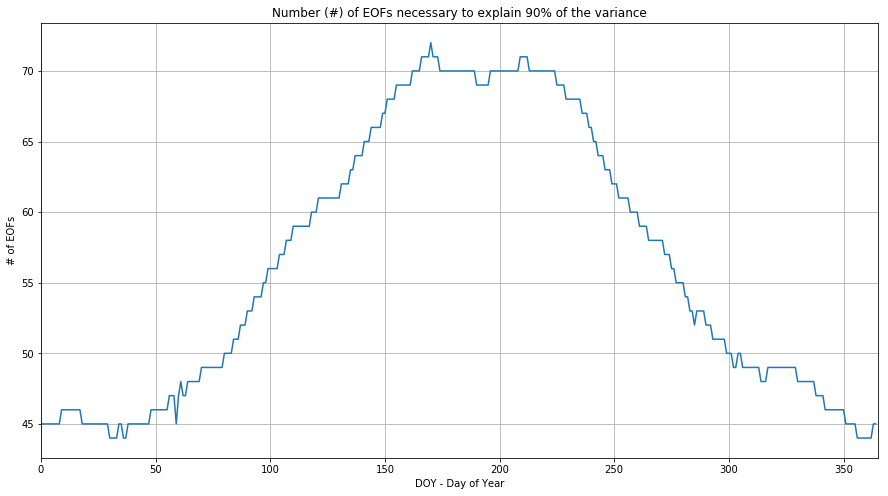

In [183]:
neof = np.asarray(neof)

plt.figure(figsize=(15,8))
plt.plot(neof)
plt.xlim(0,365)
plt.xlabel('DOY - Day of Year')
plt.ylabel('# of EOFs')
plt.title('Number (#) of EOFs necessary to explain 90% of the variance')
plt.grid()

In [184]:
eof_analyse_summer = np.load('EOFs_Analyse_doy_170.npz')
eof_analyse_winter = np.load('EOFs_Analyse_doy_10.npz')

eofs_summer = eof_analyse_summer['eofs'][:3]
eofs_winter = eof_analyse_winter['eofs'][:3]

In [185]:
lon = np.arange(-10,25.2,1.25)
lat = np.arange(32.5,67.6,1.25)
eof = [1,2,3]

In [186]:
ds = xr.Dataset({'Summer_EOF_DOY_170': (['eof','lat', 'lon'], eofs_summer),
                 'Winter_EOF_DOY_10': (['eof','lat', 'lon'], eofs_winter)},
                coords={'lat': ('lat', lat),
                        'lon': ('lon', lon),
                        'eof': eof})

In [187]:
ds

<xarray.Dataset>
Dimensions:             (eof: 3, lat: 29, lon: 29)
Coordinates:
  * lat                 (lat) float64 32.5 33.75 35.0 36.25 ... 65.0 66.25 67.5
  * lon                 (lon) float64 -10.0 -8.75 -7.5 -6.25 ... 22.5 23.75 25.0
  * eof                 (eof) int32 1 2 3
Data variables:
    Summer_EOF_DOY_170  (eof, lat, lon) float32 0.01430875 ... -0.0059875827
    Winter_EOF_DOY_10   (eof, lat, lon) float32 0.029398462 ... 0.00878958

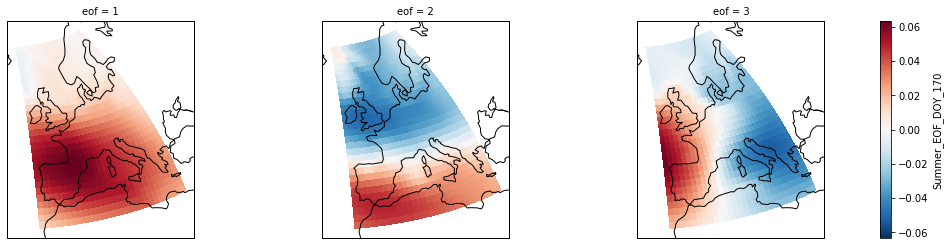

In [188]:
p = ds.Summer_EOF_DOY_170.plot(figsize=(20,4),transform=ccrs.PlateCarree(), col='eof',subplot_kws={'projection': ccrs.Orthographic(-20, 30)})

for ax in p.axes.flat:
    ax.coastlines()
    #ax.gridlines()

plt.draw();

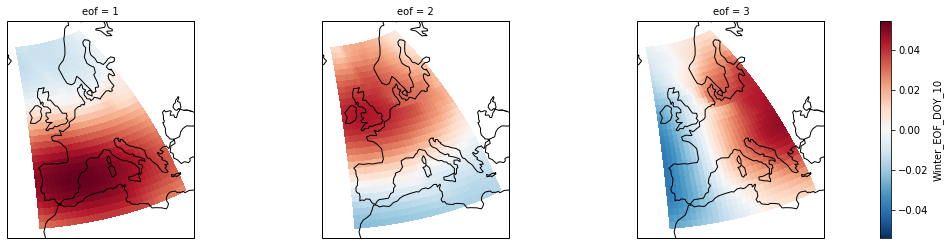

In [189]:
p = ds.Winter_EOF_DOY_10.plot(figsize=(20,4),transform=ccrs.PlateCarree(), col='eof',subplot_kws={'projection': ccrs.Orthographic(-20, 30)})

for ax in p.axes.flat:
    ax.coastlines()
    #ax.gridlines()

plt.draw();